In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

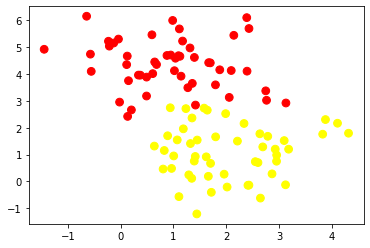

In [86]:
from sklearn.datasets._samples_generator import make_blobs
X,y = make_blobs(n_samples=100,centers=2,
                random_state=0,cluster_std=0.95)
plt.scatter(X[:,0],X[:,1],c=y,s=60,cmap='autumn');

In [26]:
y

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1])

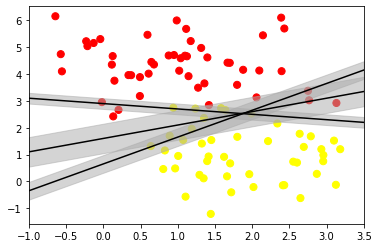

In [27]:
xfit = np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c = y, s = 50, cmap='autumn')

for m,b,d in [(1,0.65,0.33),(0.5,1.6,0.55),(-0.2,2.9,0.2)]:
    yfit = m*xfit+b
    plt.plot(xfit,yfit,'-k')
    plt.fill_between(xfit,yfit-d,yfit+d,edgecolor='none',
        color = "#AAAAAA",alpha=0.5)
plt.xlim(-1,3.5);

In [32]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear',C=1000000)
model.fit(X,y)

SVC(C=1000000, kernel='linear')

<style>
.aligncenter {
    text-align: center;
}
</style>
<p class="aligncenter">
<img src="Graphical-presentation-of-the-support-vector-machine-classifier-with-a-non-linear-kernel.png" alt="centered image" width=600 height=400 />
</p>

In [30]:
def plot_svc_decision_function(model,ax=None,plot_support=True):
    """Plot the decission function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    #create a grid to evaluate the model
    x = np.linspace(xlim[0],ylim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y,X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(),Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    #plot decission boundary and margins
    ax.contour(X,Y,P,colors='k',
        levels=[-1,0,1],alpha=0.5,
        linestyles=['--','-','--'])
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                    model.support_vectors_[:,1],
                    s=300,linewidths=1,facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

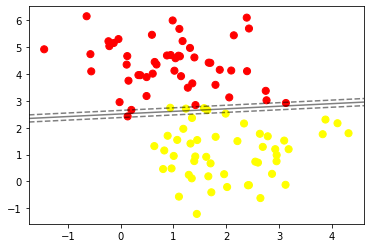

In [33]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(model);

In [21]:
model.support_vectors_

array([[0.39920934, 3.01626962],
       [2.45161058, 3.35844964],
       [1.29273731, 2.16101743]])

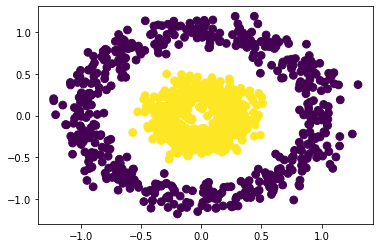

In [104]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1_000, factor=0.3, 
        noise=0.10, random_state=0)
plt.scatter(X[:,0],X[:,1],s=60,c = y);

In [46]:
# RBF kernel (radal basis function)
r = np.exp(-(X**2).sum(1))
r

array([4.19322571e-10, 3.12351597e-01, 8.66632148e-12, 2.78394017e-03,
       9.40549845e-06, 4.09595251e-05, 1.42938139e-08, 1.41020809e-09,
       6.80438261e-08, 1.77605975e-01, 1.62113267e-09, 3.49194057e-02,
       3.27213209e-13, 5.81479014e-09, 2.48375733e-03, 3.15236146e-10,
       5.62529742e-05, 1.35677738e-07, 4.23542388e-01, 2.37414776e-02,
       1.01990318e-10, 3.58141140e-09, 6.01542852e-04, 2.69870130e-12,
       8.63582030e-04, 1.24895983e-10, 1.60558312e-01, 8.73113606e-17,
       7.55803023e-11, 4.00724784e-05, 2.89870618e-03, 2.37939075e-10,
       1.48158802e-01, 2.65350357e-03, 5.87674337e-05, 4.71924899e-10,
       5.71404932e-02, 3.23407756e-05, 7.99284647e-07, 1.17981691e-01,
       1.61490913e-04, 2.09802294e-17, 2.26909667e-17, 2.52587644e-07,
       2.21472801e-04, 7.82599936e-04, 1.62921447e-02, 4.40788936e-02,
       1.21903009e-10, 7.51434982e-14, 1.98431684e-02, 1.34035332e-01,
       2.15309811e-19, 3.16240417e-12, 1.07142663e-08, 8.75665982e-11,
      

In [105]:
clf = SVC(kernel='rbf',C = 1E6)
clf.fit(X,y)

SVC(C=1000000.0)

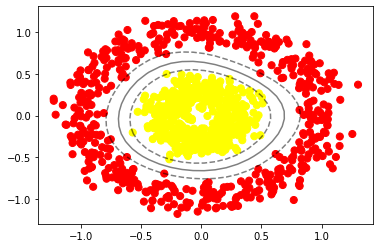

In [106]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(clf)

In [107]:
model.support_vectors_

array([[0.13287362, 2.42203068],
       [1.4186494 , 2.84435583],
       [3.13253697, 2.92213994],
       [0.20378111, 2.66381886],
       [1.35268267, 2.36352753],
       [1.64187165, 2.6544642 ],
       [0.94080029, 2.74410379],
       [1.58213669, 2.73071911],
       [1.23710312, 2.71222537]])